In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


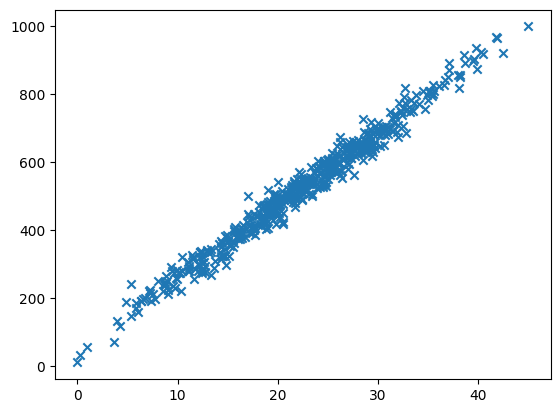

In [9]:
plt.scatter(df.Temperature, df.Revenue, marker = 'x')

In [10]:
train = df.head(400)
test = df.tail(100)

In [11]:
x = train.Temperature
y = train.Revenue
x.shape, y.shape

((400,), (400,))

In [12]:
x = np.c_[np.ones((400, 1)), x]

In [13]:
x[ : 5]

array([[ 1.        , 24.56688442],
       [ 1.        , 26.00519115],
       [ 1.        , 27.79055388],
       [ 1.        , 20.59533505],
       [ 1.        , 11.50349764]])

In [14]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [15]:
theta

array([46.02342275, 21.35810169])

In [16]:
test.head()

,Temperature,Revenue
400,24.240372,569.618756
401,38.628862,916.648613
402,0.000000,10.000000
403,24.349104,572.672047
404,26.168859,658.600456


In [17]:
x_new = np.array([[24.240372], [38.628862]])
x_new = np.c_[np.ones((2, 1)), x_new]
x_predict = x_new.dot(theta)
x_predict

array([563.75175302, 871.06258566])

In [18]:
x_new = np.array(test.Temperature)
x_new = np.c_[np.ones((100, 1)), x_new]
x_predict = x_new.dot(theta)
predict = pd.DataFrame(x_predict)
true = pd.DataFrame(test.Revenue)

In [21]:
from sklearn.metrics import r2_score
score = r2_score(true, predict)
print('R2-Score : ', score)

R2-Score :  0.9749988991666348
